# Confusion Matrix

In [1]:
from google.colab import files

uploaded = files.upload()

Saving heart.xlsx to heart.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel('heart.xlsx')

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [19]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [6]:
df.shape

(299, 13)

In [7]:
df.DEATH_EVENT.value_counts()

,count
DEATH_EVENT,
0,203
1,96


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

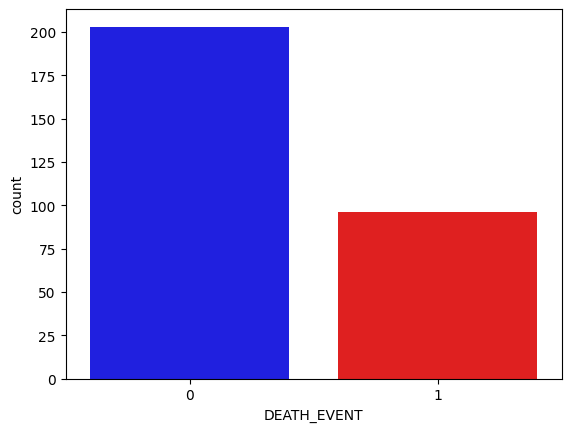

In [23]:
sns.countplot(x='DEATH_EVENT',data=df,palette=['blue', 'red'])

<Axes: xlabel='diabetes', ylabel='count'>

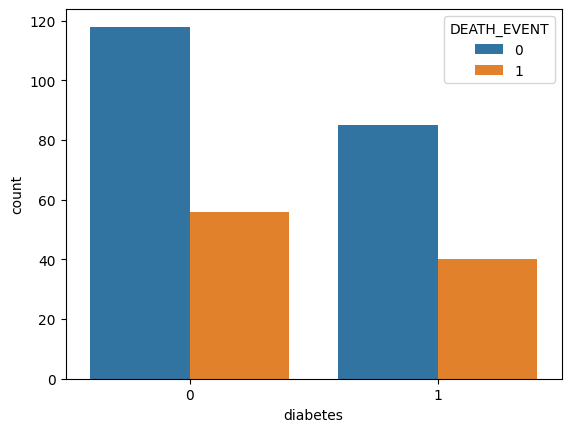

In [21]:
sns.countplot(x='diabetes',hue='DEATH_EVENT',data=df)

<Axes: xlabel='high_blood_pressure', ylabel='count'>

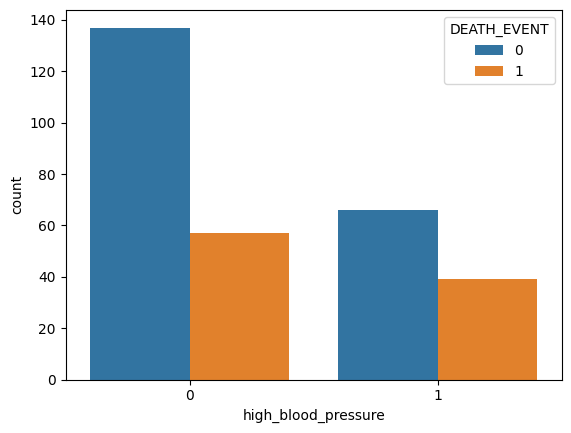

In [25]:
sns.countplot(x='high_blood_pressure',hue='DEATH_EVENT',data=df)

In [26]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


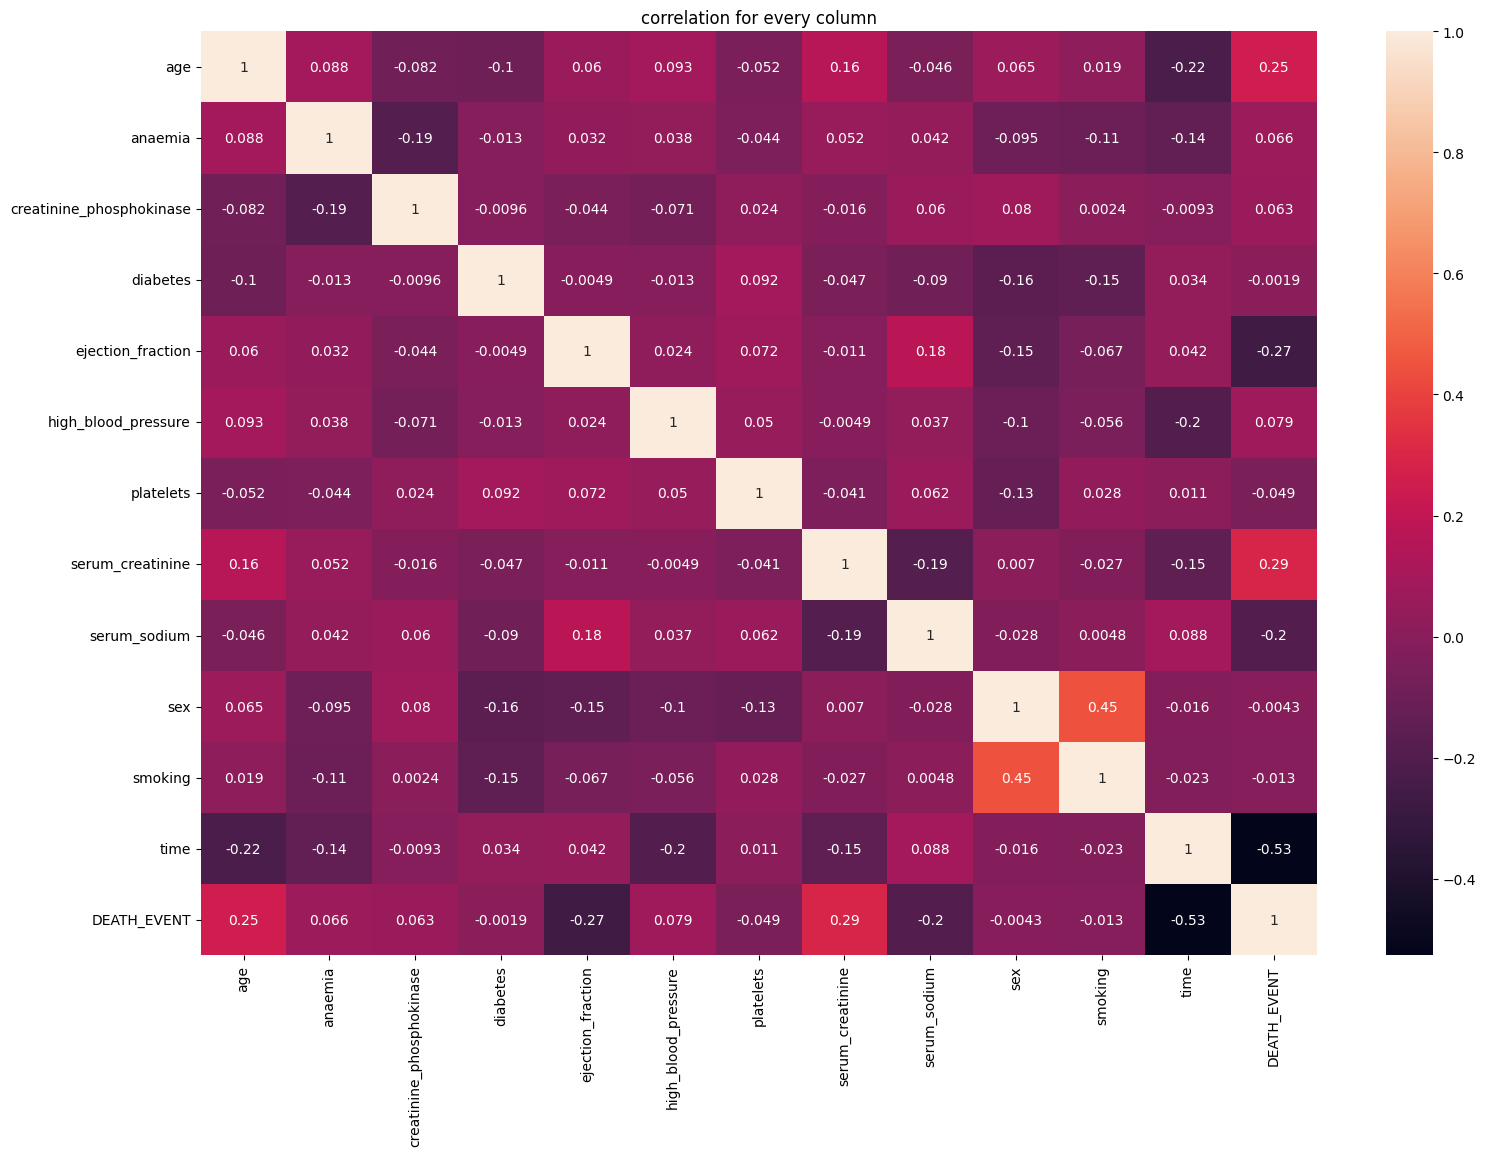

In [32]:
plt.figure(figsize=(18,12))
plt.title('correlation for every column')
sns.heatmap(df.corr(),annot=True)
plt.savefig("heatmap.png")

# Separate X,Y

In [33]:
x=df.drop('DEATH_EVENT',axis=1)
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [34]:
y=df[['DEATH_EVENT']]
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


# TrainSet & TestSet Separate

In [35]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3,random_state=42)

In [36]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
224,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,205
68,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66
222,42.0,1,86,0,35,0,365000.0,1.1,139,1,1,201
37,82.0,1,855,1,50,1,321000.0,1.0,145,0,0,30
16,87.0,1,149,0,38,0,262000.0,0.9,140,1,0,14


In [37]:
ytrain.head()

,DEATH_EVENT
224,0
68,1
222,0
37,1
16,1


In [39]:
xtrain.shape

(209, 12)

In [40]:
ytrain.shape

(209, 1)

In [41]:
xtest.shape

(90, 12)

In [42]:
ytest.shape

(90, 1)

# Decision Tree

In [43]:
dt=DecisionTreeClassifier()

In [44]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

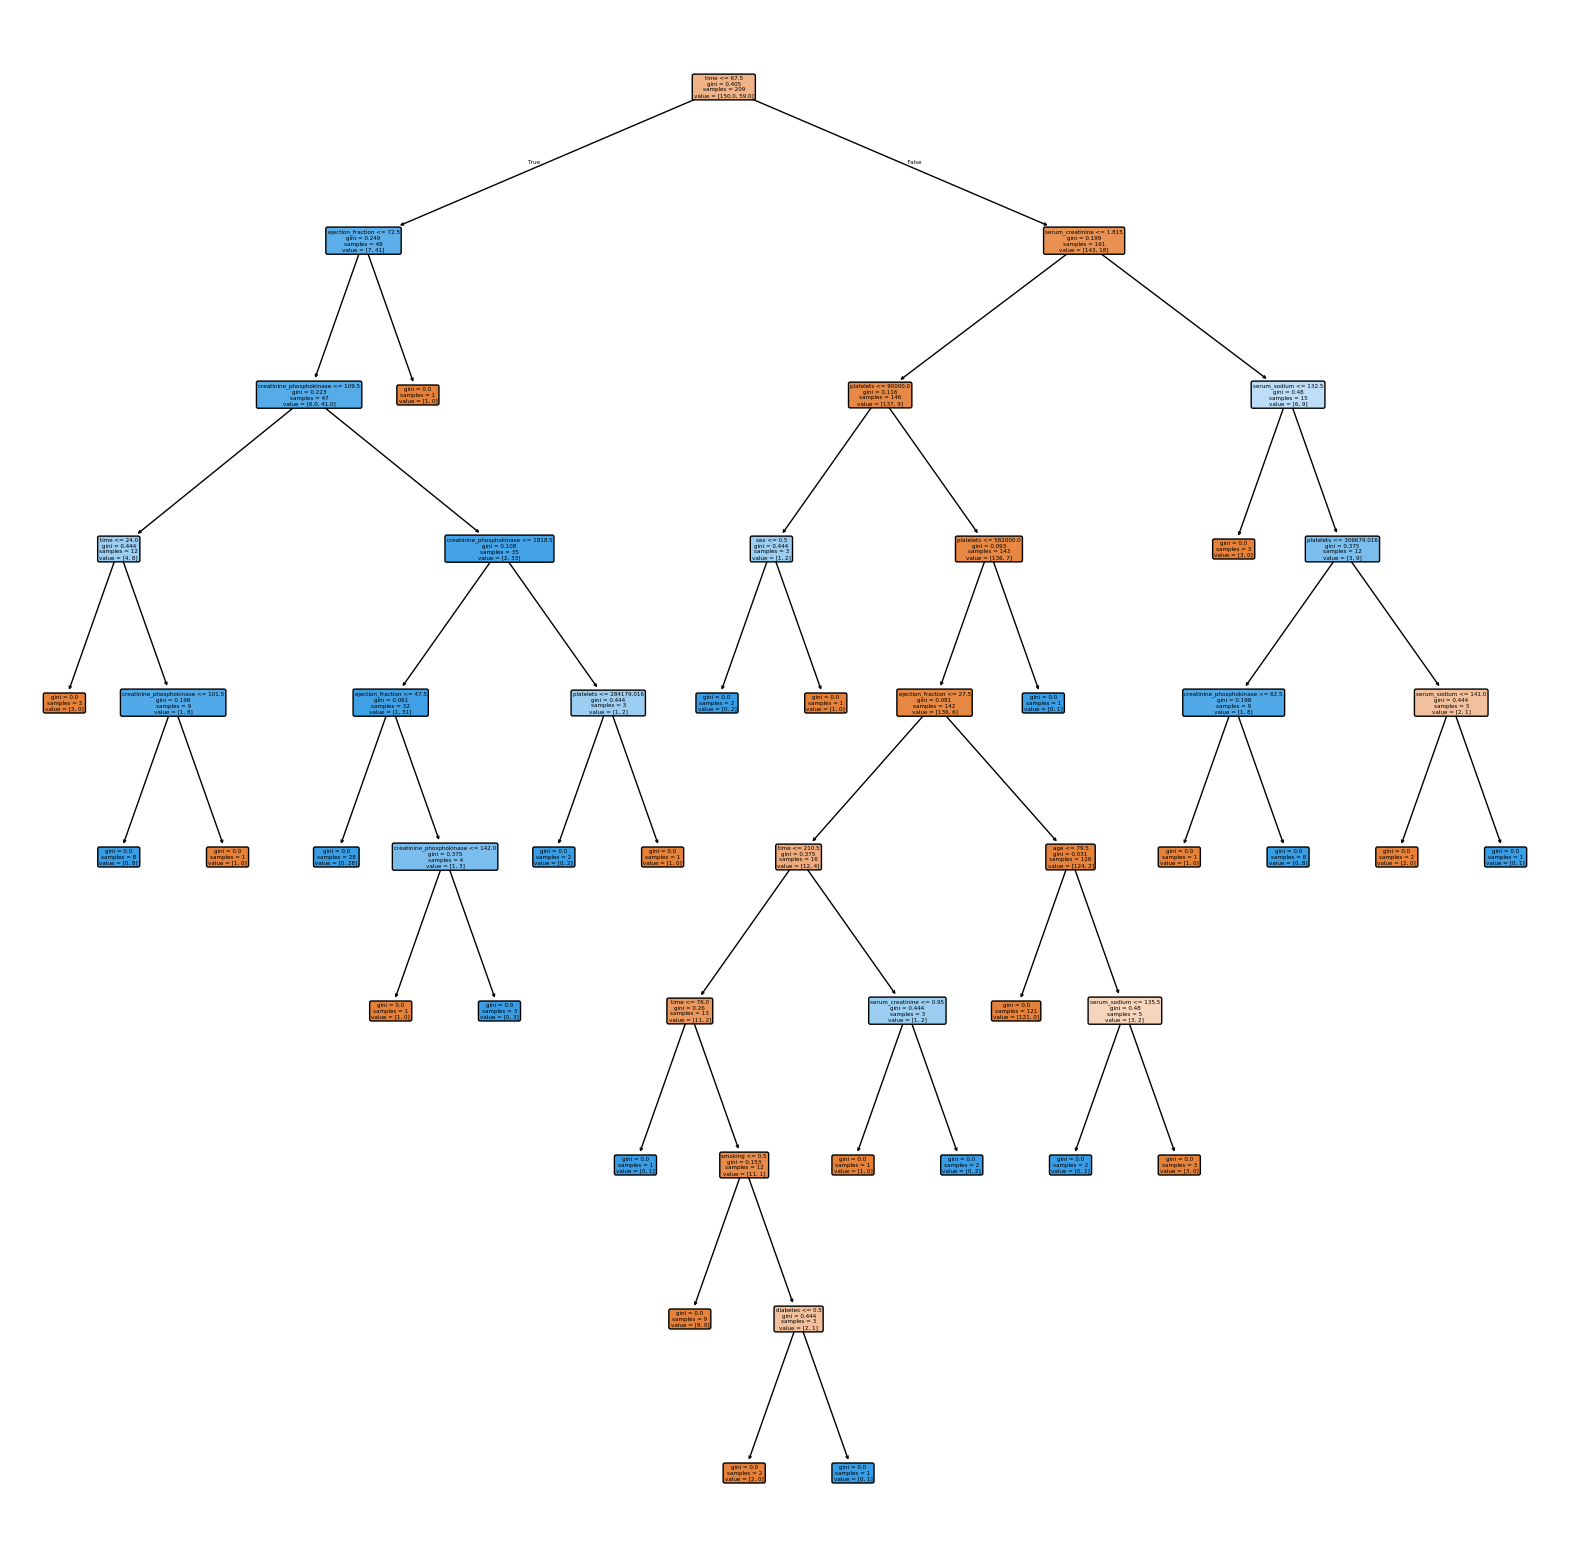

In [46]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt,filled=True,rounded=True,feature_names=x.columns)
plt.savefig("tree.png",dpi=1200)

In [48]:
pred=dt.predict(xtest)
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0])

In [49]:
np.array(ytest)

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
    

# ConfusionMatrix


In [50]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n           0       0.73      0.81      0.77        53\n           1       0.68      0.57      0.62        37\n\n    accuracy                           0.71        90\n   macro avg       0.70      0.69      0.69        90\nweighted avg       0.71      0.71      0.71        90\n'

In [51]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77        53
           1       0.68      0.57      0.62        37

    accuracy                           0.71        90
   macro avg       0.70      0.69      0.69        90
weighted avg       0.71      0.71      0.71        90



In [55]:
cm=confusion_matrix(ytest,pred)
cm

array([[43, 10],
       [16, 21]])

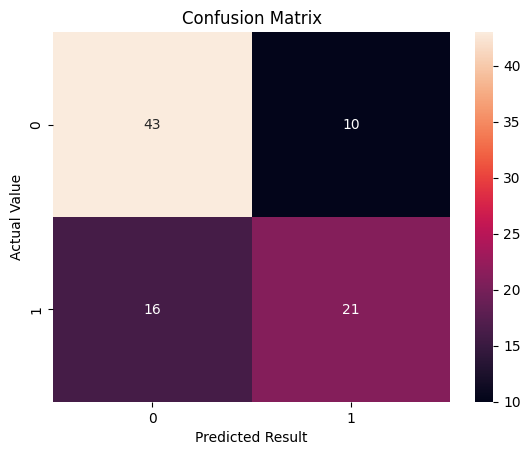

In [61]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Value")
plt.title("Confusion Matrix")
plt.savefig("Heatmap2.png")


In [62]:
tp,fn,fp,tn=confusion_matrix(ytest,pred).reshape(-1)

In [64]:
print("True Positive : ",tp)
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)

True Positive :  43
True Negative :  21
False Positive :  16
False Negative :  10


In [65]:
accuracy_score(ytest,pred)

0.7111111111111111

In [66]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
accuracy

np.float64(0.7111111111111111)

In [67]:
precision = tp/(tp+fp)
precision

np.float64(0.7288135593220338)

In [70]:
from sklearn.metrics import RocCurveDisplay as pc #roc / auc = precision curve

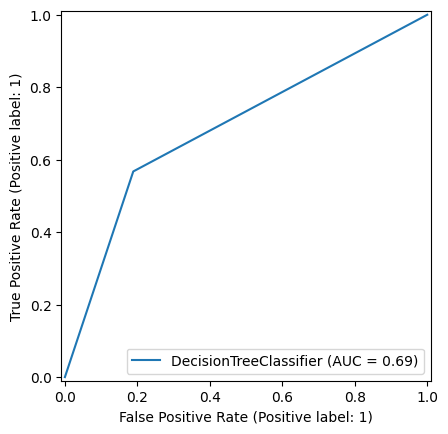

In [73]:
pc.from_estimator(dt, xtest, ytest)
plt.savefig("roc.png")

In [74]:
accuracy_score(ytest,pred)

0.7111111111111111

In [75]:
dt.score(xtest,ytest)

0.7111111111111111